In [35]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

In [36]:
def stupid_compare(summ, pattern):
    if all(summ >= pattern):
        return True
    return False

In [37]:
#базовая идея алгоритма
def detector_base(image, k = 0.99, size = 15):
    gray = rgb2gray(image)
    summ = gray.sum(axis = 0)
    maxx = max(summ)
    pattern = np.ones(size) * maxx * k
    i = 0
    #график
    #plt.figure(figsize=(10, 8))
    #fontsize=25
    #plt.hlines(maxx * k, 0, gray.shape[1])
    #plt.plot(summ, 'r', label = 'summ')
    #plt.legend(fontsize=fontsize)
    #
    while summ[i] >= (maxx * k):
        i += 1
        if i >= len(summ):
            return "Bad picture"
    j = 1
    while summ[len(summ) - j] >= (maxx * k):
        j += 1
        
    while i < len(summ)-size-1-j:
        if stupid_compare(summ[i:i+size], pattern):
            #print(summ[i:i+size], pattern)
            #print(i, j)
            return True
        i += 1
    return False

In [38]:
#пропускаем столбцы из одного слова, не считаем их столбцами
#используются параметры, полученный оптимизацией "функции ошибок"
%matplotlib inline
#0.97986979, 10.17013889, 29.88541667
def detector(image, k = 0.97986979, size = int(10.17013889), length = int(29.88541667)):
    gray = rgb2gray(image)
    summ = gray.sum(axis = 0)
    maxx = max(summ)
    pattern = np.ones(size) * maxx * k
    i = 0
    #график
    #plt.figure(figsize=(10, 8))
    #fontsize=25
    #plt.hlines(maxx * k, 0, gray.shape[1])
    #plt.plot(summ, 'r', label = 'summ')
    #plt.legend(fontsize=fontsize)
    #
    while summ[i] >= (maxx * k):
        i += 1
        if i >= len(summ):
            return "Bad picture"
    j = 1
    while summ[len(summ) - j] >= (maxx * k):
        j += 1
    #print("i = ", i," j = ", j)
    #if(i < j):
    #    i = j
    ind1 = i - 1
    while i < len(summ)-size-1-j:
        if summ[i] >= maxx * k:
            ind2 = i
            if ind2 - ind1 <= length:
                ind1 = ind2
            else:
                if stupid_compare(summ[i:i+size], pattern):
                    return True
        i += 1
    return False

In [39]:
%matplotlib inline
#0.97986979, 10.17013889, 29.88541667
#алгоритм забивает на края: идем по сумме с свух противоположных сторон, находим индекс с большим номером,
#индекс с меньшим номером переносим симметрично(относительно соотвествующего края) в силу сииметрии содержательной
#части документа
#этот алгоритм по-моему мнению является более костыльным, поэтому основной упор в detector
def detector0(image, k = 0.985, size = 10):
    gray = rgb2gray(image)
    summ = gray.sum(axis = 0)
    maxx = max(summ)
    pattern = np.ones(size) * maxx * k
    i = 0
    #график
    #plt.figure(figsize=(10, 8))
    #fontsize=25
    #plt.hlines(maxx * k, 0, gray.shape[1])
    #plt.plot(summ, 'r', label = 'summ')
    #plt.legend(fontsize=fontsize)
    #
    while summ[i] >= (maxx * k):
        i += 1
        if i >= len(summ):
            return "Bad picture"
    j = 1
    while summ[len(summ) - j] >= (maxx * k):
        j += 1
    #print("i = ", i," j = ", j)
    if(i < j):
        i = j
    while i < len(summ)-size-1-j:
        if stupid_compare(summ[i:i+size], pattern):
            return True
        i += 1
    return False

In [66]:
'''
%matplotlib inline

def detector(image, k = 0.95, size = 10):
    gray = rgb2gray(image)
    summ = gray.sum(axis = 0)
    maxx = max(summ)
    pattern = np.ones(size) * maxx * k
    i = 0
    #график
    #plt.figure(figsize=(10, 8))
    #fontsize=25
    #plt.hlines(maxx * k, 0, gray.shape[1])
    #plt.plot(summ, 'r', label = 'summ')
    #plt.legend(fontsize=fontsize)
    #
    while summ[i] >= (maxx * k):
        i += 1
    j = 1
    while summ[len(summ) - j] >= (maxx * k):
        j += 1
    while i < len(summ)-size-1-j:
        if stupid_compare(summ[i:i+size], pattern):
            #print(summ[i:i+size], pattern)
            #print(i, j)
            return True
        i += 1
    return False
'''

"\n%matplotlib inline\n\ndef detector(image, k = 0.95, size = 10):\n    gray = rgb2gray(image)\n    summ = gray.sum(axis = 0)\n    maxx = max(summ)\n    pattern = np.ones(size) * maxx * k\n    i = 0\n    #график\n    #plt.figure(figsize=(10, 8))\n    #fontsize=25\n    #plt.hlines(maxx * k, 0, gray.shape[1])\n    #plt.plot(summ, 'r', label = 'summ')\n    #plt.legend(fontsize=fontsize)\n    #\n    while summ[i] >= (maxx * k):\n        i += 1\n    j = 1\n    while summ[len(summ) - j] >= (maxx * k):\n        j += 1\n    while i < len(summ)-size-1-j:\n        if stupid_compare(summ[i:i+size], pattern):\n            #print(summ[i:i+size], pattern)\n            #print(i, j)\n            return True\n        i += 1\n    return False\n"

In [41]:
%matplotlib inline
#параметры подобраны оптмизатором 0.97986979, 10.17013889, 29.88541667
#рисует распределение интенсивности
def graph_detector(image, k = 0.97986979, size = int(10.17013889), length = int(29.88541667)):
    gray = rgb2gray(image)
    summ = gray.sum(axis = 0)
    maxx = max(summ)
    pattern = np.ones(size) * maxx * k
    i = 0
    #график
    plt.figure(figsize=(10, 8))
    fontsize=25
    plt.hlines(maxx * k, 0, gray.shape[1])
    plt.plot(summ, 'r', label = 'summ')
    plt.legend(fontsize=fontsize)
    while summ[i] >= (maxx * k):
        i += 1
        if i >= len(summ):
            return "Bad picture"
    j = 1
    while summ[len(summ) - j] >= (maxx * k):
        j += 1
    ind1 = i - 1
    while i < len(summ)-size-1-j:
        if summ[i] >= maxx * k:
            ind2 = i
            if ind2 - ind1 <= length:
                ind1 = ind2
            else:
                if stupid_compare(summ[i:i+size], pattern):
                    plt.plot(summ, 'r', label = 'summ')
                    plt.hlines(maxx * k, i, i+size, colors = 'w')
                    return "Many columns"
        i += 1
    plt.plot(summ, 'r', label = 'summ')
    return "One Column"

In [42]:

%matplotlib inline
#забиваем на меньший край и рисуем распределение интенсивности
def graph_detector0(image, k = 0.97986979, size = int(10.17013889)):
    gray = rgb2gray(image)
    summ = gray.sum(axis = 0)
    maxx = max(summ)
    pattern = np.ones(size) * maxx * k
    i = 0
    #график
    plt.figure(figsize=(10, 8))
    fontsize=25
    plt.hlines(maxx * k, 0, gray.shape[1])
    plt.plot(summ, 'r', label = 'summ')
    plt.legend(fontsize=fontsize)
    while summ[i] >= (maxx * k):
        i += 1
        if i >= len(summ):
            return "Bad picture"
    j = 1
    while summ[len(summ) - j] >= (maxx * k):
        j += 1
    if i < j:
        i = j;
    while i < len(summ)-size-1-j:
            if stupid_compare(summ[i:i+size], pattern):
                plt.plot(summ, 'r', label = 'summ')
                plt.hlines(maxx * k, i, i+size, colors = 'w')
                return "Many columns"
            i += 1
    plt.plot(summ, 'r', label = 'summ')
    return "One Column"

In [43]:
#image7 = plt.imread('7.jpg')
data1 = []
names = []
i = 1
while i != 61:
    name = "data/1/" + str(i) + ".png"
    names.append(name)
    i += 1
print(names)

['data/1/1.png', 'data/1/2.png', 'data/1/3.png', 'data/1/4.png', 'data/1/5.png', 'data/1/6.png', 'data/1/7.png', 'data/1/8.png', 'data/1/9.png', 'data/1/10.png', 'data/1/11.png', 'data/1/12.png', 'data/1/13.png', 'data/1/14.png', 'data/1/15.png', 'data/1/16.png', 'data/1/17.png', 'data/1/18.png', 'data/1/19.png', 'data/1/20.png', 'data/1/21.png', 'data/1/22.png', 'data/1/23.png', 'data/1/24.png', 'data/1/25.png', 'data/1/26.png', 'data/1/27.png', 'data/1/28.png', 'data/1/29.png', 'data/1/30.png', 'data/1/31.png', 'data/1/32.png', 'data/1/33.png', 'data/1/34.png', 'data/1/35.png', 'data/1/36.png', 'data/1/37.png', 'data/1/38.png', 'data/1/39.png', 'data/1/40.png', 'data/1/41.png', 'data/1/42.png', 'data/1/43.png', 'data/1/44.png', 'data/1/45.png', 'data/1/46.png', 'data/1/47.png', 'data/1/48.png', 'data/1/49.png', 'data/1/50.png', 'data/1/51.png', 'data/1/52.png', 'data/1/53.png', 'data/1/54.png', 'data/1/55.png', 'data/1/56.png', 'data/1/57.png', 'data/1/58.png', 'data/1/59.png', 'data

In [44]:
for j in names:
    data1.append(plt.imread(j))

In [45]:
#data0 = []
#data0.append(plt.imread('data/1/1.png'))

In [46]:
correct1 = 0
error1 = []
for it in data1:
    if detector(it) == False:
        correct1 += 1
    else:
        error1.append(it)

In [47]:
print(correct1/60)

0.8833333333333333


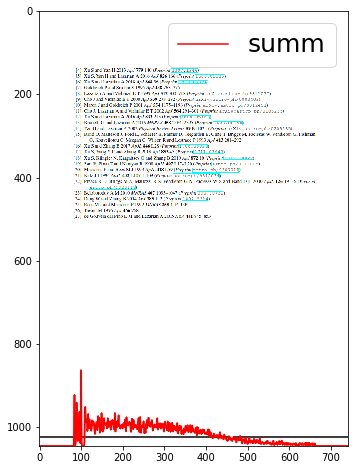

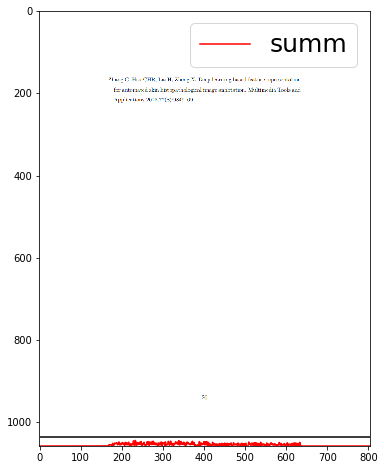

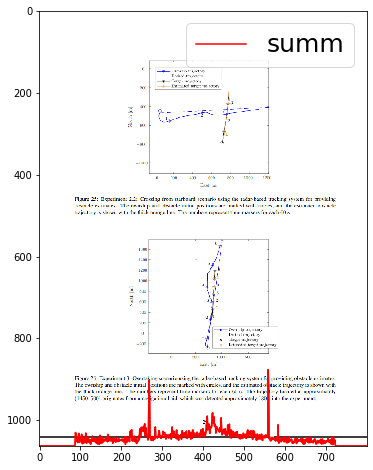

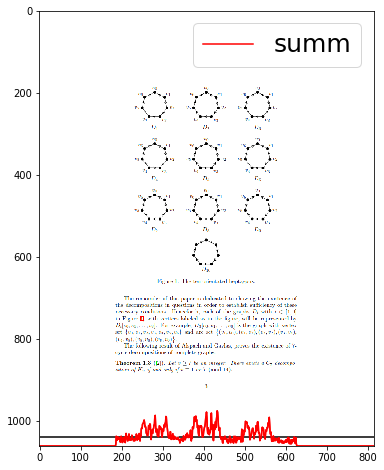

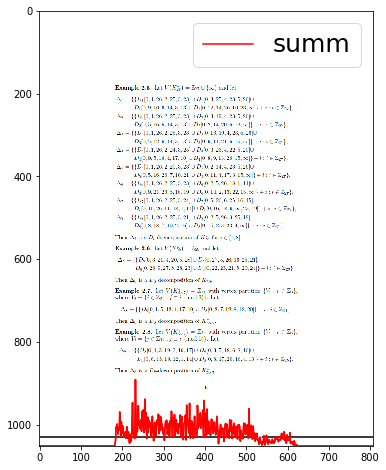

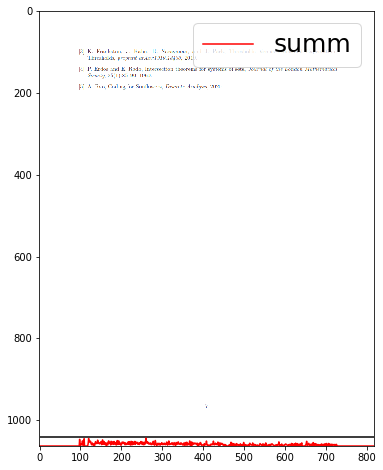

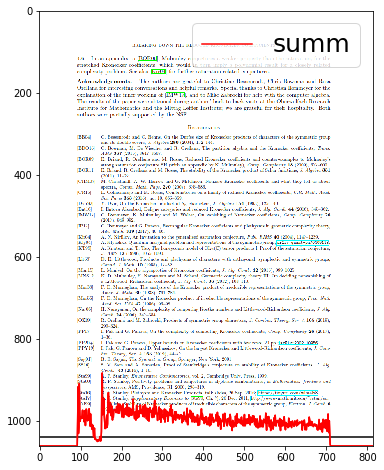

In [48]:
for i in error1:
    graph_detector(i)
    plt.imshow(i)

Первые очевидные проблемы:

    1)мало строк в документе

    2)есть пронумерованный столбец, отделенный от текста

    3)надписи на полях

In [49]:
data2 = []
names2 = []
i = 1
while i != 61:
    name = "data/2/" + str(i) + ".png"
    names2.append(name)
    i += 1
print(names2)

['data/2/1.png', 'data/2/2.png', 'data/2/3.png', 'data/2/4.png', 'data/2/5.png', 'data/2/6.png', 'data/2/7.png', 'data/2/8.png', 'data/2/9.png', 'data/2/10.png', 'data/2/11.png', 'data/2/12.png', 'data/2/13.png', 'data/2/14.png', 'data/2/15.png', 'data/2/16.png', 'data/2/17.png', 'data/2/18.png', 'data/2/19.png', 'data/2/20.png', 'data/2/21.png', 'data/2/22.png', 'data/2/23.png', 'data/2/24.png', 'data/2/25.png', 'data/2/26.png', 'data/2/27.png', 'data/2/28.png', 'data/2/29.png', 'data/2/30.png', 'data/2/31.png', 'data/2/32.png', 'data/2/33.png', 'data/2/34.png', 'data/2/35.png', 'data/2/36.png', 'data/2/37.png', 'data/2/38.png', 'data/2/39.png', 'data/2/40.png', 'data/2/41.png', 'data/2/42.png', 'data/2/43.png', 'data/2/44.png', 'data/2/45.png', 'data/2/46.png', 'data/2/47.png', 'data/2/48.png', 'data/2/49.png', 'data/2/50.png', 'data/2/51.png', 'data/2/52.png', 'data/2/53.png', 'data/2/54.png', 'data/2/55.png', 'data/2/56.png', 'data/2/57.png', 'data/2/58.png', 'data/2/59.png', 'data

In [50]:
for j in names2:
    data2.append(plt.imread(j))

In [51]:
correct2 = 0
error2 = []
for it in data2:
    if detector(it) == True:
        correct2 += 1
    else:
        error2.append(it)

In [52]:
print(correct2/60)

0.95


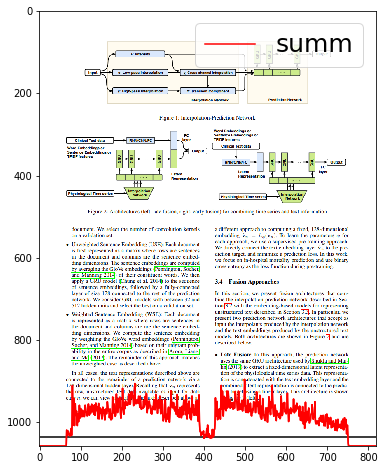

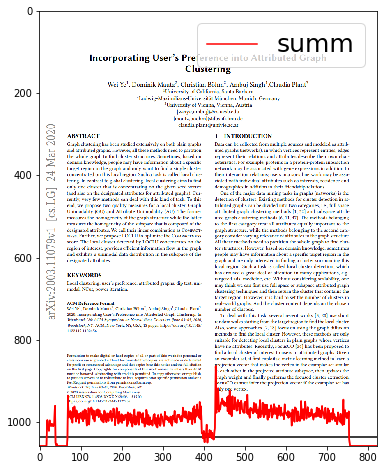

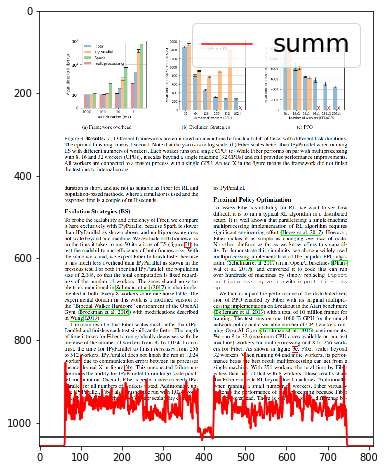

In [53]:
for i in error2:
    graph_detector0(i)
    plt.imshow(i)

Для многостолбцовых документов:

    1)есть картинка, подпись, во всю ширину
    
    2*)ширина patterna

Ближайшая цель:

На предложенных данных оптимизировать параметры, посмотреть результаты.

'One Column'

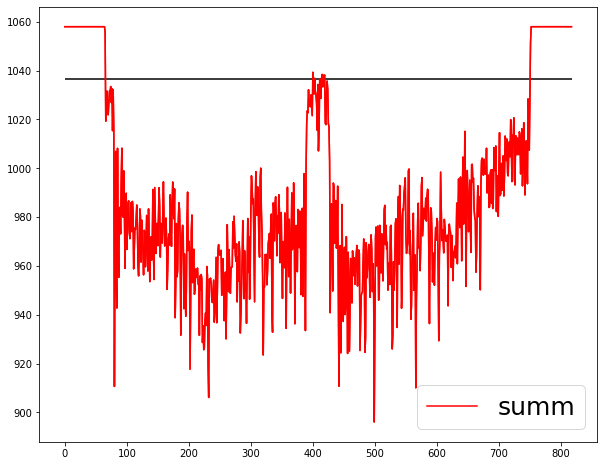

In [54]:
graph_detector(error2[0])

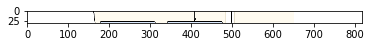

In [55]:
plt.imshow(error2[0][160:190])

функция ошибки:
    1) max a/60 + b/60

In [56]:
from scipy.optimize import minimize

In [57]:
int(6.5)

6

In [58]:
def minimum_func(x0):
    correct1 = 0
    error1 = []
    for it in data1:
        if detector(it, x0[0], int(x0[1]), int(x0[2])) == False:
            correct1 += 1
        else:
            error1.append(it)
    correct2 = 0
    error2 = []
    for it in data2:
        if detector(it, x0[0], int(x0[1]), int(x0[2])) == True:
            correct2 += 1
        else:
            error2.append(it)
    return 2 - correct1/len(data1) - correct2/len(data2)

In [59]:
x0 = [0.985, 10, 30]
print(minimum_func(x0))

0.20000000000000018


In [60]:
sol = minimize(minimum_func, x0, method="Nelder-Mead")

In [61]:
print(sol)

 final_simplex: (array([[ 0.97986979, 10.17013889, 29.88541667],
       [ 0.97986977, 10.17011974, 29.88547113],
       [ 0.97986963, 10.17012403, 29.88548624],
       [ 0.97986981, 10.17013274, 29.88545359]]), array([0.16666667, 0.16666667, 0.16666667, 0.16666667]))
           fun: 0.16666666666666674
       message: 'Optimization terminated successfully.'
          nfev: 90
           nit: 24
        status: 0
       success: True
             x: array([ 0.97986979, 10.17013889, 29.88541667])


Добавлен костыль: отбрасываем из кандидатов на столбец все, что имеет длину меньше слова(полагаем, что таблица не может состоять только из одного слова.

Нашли оптимальные параметры, предложенного на данный момент алгоритма.

Цель: разбивать изображение на полоски, пробовать приведенный выше алгоритм на них.

Проблема: понимать, где колонки 2, а где идет изображние с подписью.

# Пробуем разбивать изображение на 'полоски' некоторой ширины, в них ищем цельные фрагменты: без скачков интенсивности, если таких полосок набралось больше половины, то считаем, что картинка содержит один столбец

In [ ]:
def line_detection(g_image, )

In [68]:
plt.imread('10.png')

FileNotFoundError: [Errno 2] No such file or directory: '10.png'